#  LabTest: ML model deployment



ปรับแต่งโค้ดที่ให้มาเพื่อสร้างโมเดล และ Deploy บน Streamlit


 ส่ง
- LabTest-xxx.ipynb
- model_penguin_xxx.pkl
- app_predict_penguin_XXX.py
- LabTest-xxx.pdf


## Import Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
ls /content/drive/MyDrive/AI3

LabTest-xxx.ipynb  penguins_size.csv


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pickle


## Prepare Data

In [20]:
df_org = pd.read_csv('/content/drive/MyDrive/AI3/penguins_size.csv')
df_org.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Handle Missing Data

In [28]:
import pandas as pd

# Use read_csv to load the file directly into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/AI3/penguins_size.csv')
df.isna().sum() / len(df) * 100

,0
species,0.000000
island,0.000000
culmen_length_mm,0.581395
culmen_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,2.906977


In [31]:
df = df.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']).copy()
df.loc[:, 'sex'] = df['sex'].fillna(df['sex'].mode()[0])
df.loc[:, 'sex'] = df['sex'].replace(to_replace='.', value=df['sex'].mode()[0])


In [32]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [33]:
df= df.dropna(subset = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g'])
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['sex'] = df['sex'].replace(to_replace='.', value = df['sex'].mode()[0])

In [34]:
df.isna().sum()/len(df)*100

,0
species,0.0
island,0.0
culmen_length_mm,0.0
culmen_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
sex,0.0


## Categotical Encoding

In [35]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [36]:
df['species'].unique()
# df['island'].unique()
# df['sex'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [37]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

# species_encoder = LabelEncoder().fit(['Adelie', 'Chinstrap', 'Gentoo'])
species_encoder = LabelEncoder().fit(df['species'])

# island_encoder = LabelEncoder().fit(['Torgersen', 'Biscoe', 'Dream'])
island_encoder = LabelEncoder().fit(df['island'])

# sex_encoder = LabelEncoder().fit(['MALE', 'FEMALE'])
sex_encoder = LabelEncoder().fit(df['sex'])


In [38]:
species_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Train/Test Data Split

In [39]:
X = df.drop('species', axis=1)
y = df['species']

In [40]:
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Trining / Create Model using XXX Alg

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Example of handling categorical and numeric data separately
numeric_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']  # Replace with your numeric columns
categorical_features = ['island', 'sex']  # Replace with your categorical columns

# Define transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define pipeline with preprocessing and classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the pipeline (



## Testing / Evaluation

              precision    recall  f1-score   support

      Adelie     1.0000    1.0000    1.0000        35
   Chinstrap     1.0000    1.0000    1.0000        12
      Gentoo     1.0000    1.0000    1.0000        22

    accuracy                         1.0000        69
   macro avg     1.0000    1.0000    1.0000        69
weighted avg     1.0000    1.0000    1.0000        69



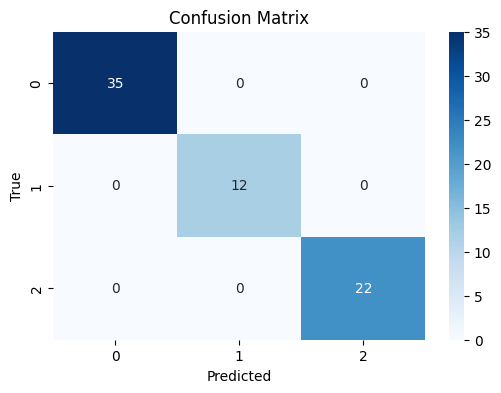

In [48]:
# Fit the model to ensure the ColumnTransformer and the classifier are trained
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
summary_eval = classification_report(y_test, y_pred, digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_knn.png')
plt.show()


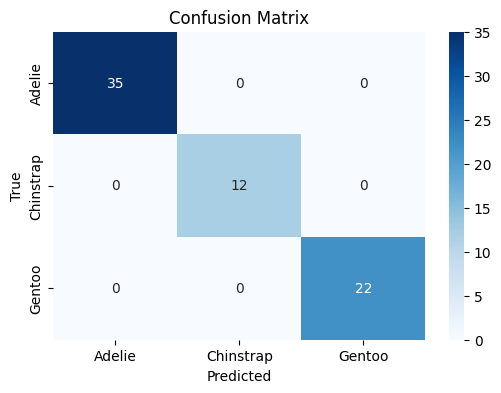

In [52]:
# Ensure that the species_encoder is fitted on y_train (before predictions)
species_encoder = LabelEncoder()
species_encoder.fit(y_train)  # Fit the encoder on y_train

# Transform y_test and y_pred using the encoder
y_test_encoded = species_encoder.transform(y_test)  # Encode y_test
y_pred_encoded = species_encoder.transform(y_pred)  # Encode y_pred

# Calculate the confusion matrix using the encoded labels
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=species_encoder.classes_,  # Use the classes from the encoder
            yticklabels=species_encoder.classes_)  # Use the classes from the encoder
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_knn.png')
plt.show()



## Save Model and etc.

In [57]:
import pickle

# Create a tuple or any container object with your variables
data_to_save = (model, species_encoder, island_encoder, sex_encoder)

# Specify the full path where the file should be saved
file_path = '/content/drive/MyDrive/AI3'

# Open a file in binary write mode
with open('model_penguin_66130701917.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)


In [59]:
import os
print('/content/drive/MyDrive/AI3')

/content/drive/MyDrive/AI3


In [60]:
ls

confusion_matrix_knn.png  drive/  model_penguin_66130701917.pkl  sample_data/


In [54]:
# Create a tuple or any container object with your variables
data_to_save = (model, species_encoder, island_encoder ,sex_encoder)

# Open a file in binary write mode
with open('model_penguin_66130701917.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

In [61]:
import pickle

# Create a tuple or any container object with your variables
data_to_save = (model, species_encoder, island_encoder, sex_encoder)

# Specify the full path where the file should be saved
file_path = '/content/drive/MyDrive/AI3/model_penguin_66130701917.pkl'

# Open a file in binary write mode and save the data
with open(file_path, 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)


## Load Model and Prediction

Kernel -> Restart Kernel..

In [62]:
import pickle
import pandas as pd

In [64]:

with open('model_penguin_66130701917.pkl', 'rb') as file:
    # Load the data from the file
    model, species_encoder, island_encoder ,sex_encoder = pickle.load(file)

### New data

In [65]:
x_new =  pd.DataFrame()
x_new['island'] = ['Torgersen']
x_new['culmen_length_mm'] = [37.0]
x_new['culmen_depth_mm'] = [19.3]
x_new['flipper_length_mm'] = [192.3]
x_new['body_mass_g'] = [3750]
x_new['sex'] = ['MALE']


### Categorical Data Encoding

In [66]:
x_new['island'] = island_encoder.transform(x_new['island'])
x_new['sex'] = sex_encoder.transform(x_new['sex'])


### Predicting

In [96]:
import sklearn
import pickle
import pandas as pd


In [97]:
with open('model_penguin_66130701917.pkl', 'rb') as file:
    model, species_encoder, island_encoder, sex_encoder = pickle.load(file)

In [99]:
x_new = pd.DataFrame()
x_new['island'] = ['Torgersen']
x_new['culmen_length_mm'] = [37.0]
x_new['culmen_depth_mm'] = [19.3]
x_new['flipper_length_mm'] = [192.3]
x_new['body_mass_g'] = [3750]
x_new['sex'] = ['MALE']

In [100]:
x_new['island'] = x_new['island'].fillna('Unknown')  # Fill missing values with a placeholder if needed
x_new['sex'] = x_new['sex'].fillna('Unknown')

In [101]:
x_new['island'] = island_encoder.transform(x_new['island'])  # Transform using the encoder
x_new['sex'] = sex_encoder.transform(x_new['sex'])

In [103]:
x_new = x_new.astype(float)

In [104]:
if 'scaler' in model.named_steps:
    x_new_scaled = model.named_steps['scaler'].transform(x_new)
else:
    x_new_scaled = x_new

In [110]:
y_pred_new = model.predict(x_new_scaled)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Create app_predict_knn_penguin.py for Running with streamlit

https://docs.streamlit.io/library/api-reference

streamlit run app_predict_knn_penguin.py

In [ ]:
%%writefile app_predict_penguin_XXX.py


#xxxx



## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://github.com/



In [ ]:
%%writefile requirements.txt

scikit-learn
pandas
